## Intro to Business Analytics Assignment 1

### Contributors
- Stanisław Howard
- Alexis Van den Heede
- Matthias Van Mechelen


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/Trips_2018.csv')

In [4]:
df_copy = df.copy()
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [5]:
# rerun this to save time if you make a typo and need original df again
df = df_copy.copy()

In [6]:
# col 0 is unnamed, change name to trip_id convert column to index
df.rename(columns={'Unnamed: 0':'trip_id'}, inplace=True)
df.set_index('trip_id', inplace=True)
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [7]:
#  convert start time and stop time to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [8]:
# make user type dummy, get shape
df = pd.get_dummies(df, columns=['usertype'], dtype=int, drop_first=True)
print(df.shape)
df.head()


(17548339, 13)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1


In [9]:
# plotting coordinates
def plot_map(coords):
    plt.scatter(coords[:,0], coords[:,1], s=0.75)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [10]:
# get lat and long
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)



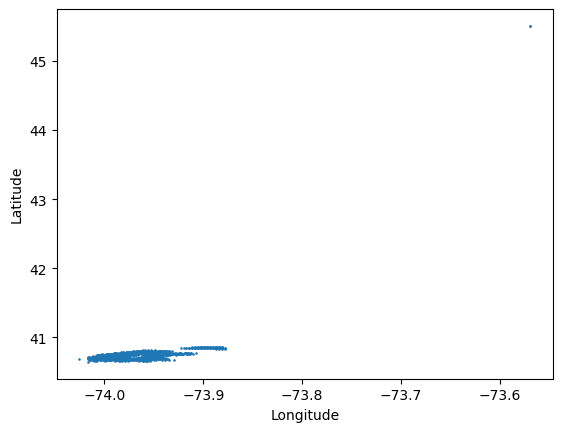

In [11]:
plot_map(coords)


Notice outlier (Canada, Montreal). quickly get rid of it to get an overview of the rest of the data. We will not yet delete the outlier datapoint from the dataframe.

In [12]:
# get rid of outlier longitude > -73.6
coords = coords[coords[:,0] < -73.6]
print(coords.shape) #shape is 917 here as it still includes the grid anomalies

(917, 2)


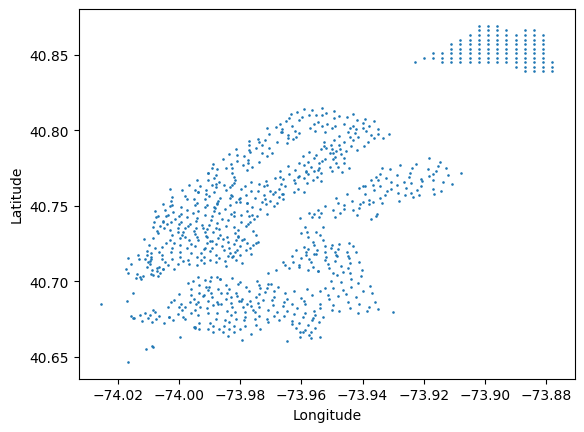

In [13]:
plot_map(coords)
# shows the unique start and end stations present in the dataset.

Notice very structured grid in top right corner. After investigation these data points were NaN's. We will rid of these data points, and at the same time we get rid of the canada outlier. 

In [14]:
# print where nan is in df, get rid of nan (= get rid of gridded outliers), create copy of df and start station coordinates
print(df.isnull().sum())
df = df[~np.isnan(df['start_station_id'])]
df = df[~np.isnan(df['end_station_id'])]
# get rid of Canada outlier
df = df[df['start_station_longitude'] < -73.6]
df = df[df['end_station_longitude'] < -73.6]
# get lat and long
coords_start = df[['start_station_longitude','start_station_latitude']].values
coords_start = np.unique(coords_start, axis=0)
coords_start_copy = coords_start.copy()
print(coords.shape)

tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
birth_year                    0
gender                        0
usertype_Subscriber           0
dtype: int64
(917, 2)


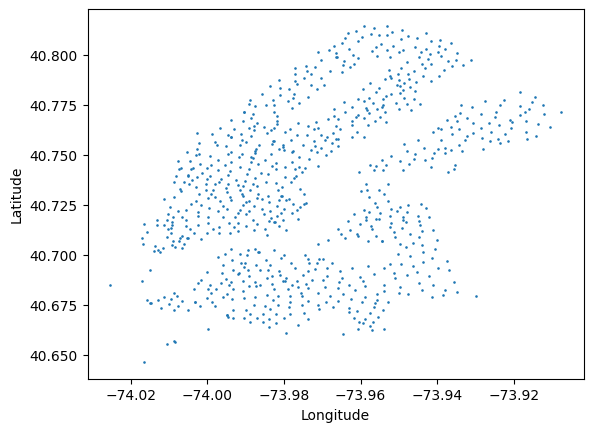

In [15]:
plot_map(coords_start)

In [16]:
#amount of distinct end stations does not match amount of start stations as seen from comparing shapes, create copy of end station coordinates.
coords_end = df[['end_station_longitude','end_station_latitude']].values
coords_end = np.unique(coords_end, axis=0)
print(coords_end.shape)
print(coords_start.shape)
coords_end_copy = coords_end.copy()


(849, 2)
(817, 2)


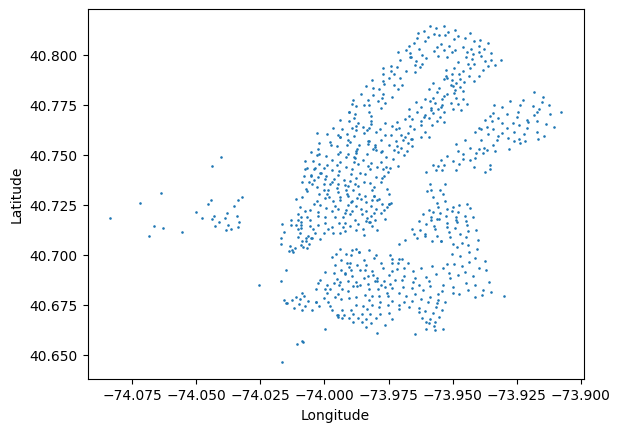

In [17]:
#what does the difference look like visually?
plot_map(coords_end)

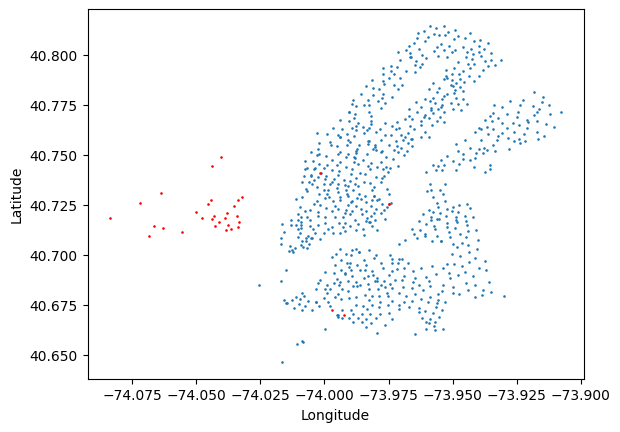

In [18]:
#highlight the end stations that are not in the start stations on the map of all en
coords_end_not_in_start = []
for i in range(len(coords_end)):
    if coords_end[i] not in coords_start:
        coords_end_not_in_start.append(coords_end[i])
coords_end_not_in_start = np.array(coords_end_not_in_start)
plt.scatter(coords_start[:,0], coords_start[:,1], s=0.75)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.scatter(coords_end_not_in_start[:,0], coords_end_not_in_start[:,1], s=0.75, c='r')
plt.show()


Since there are more end stations than start stations and all start stations are also an end station, the clustering should be done using the end stations in order to cluster every station considered in the data. 

Clustering the stations

In [19]:
# import kmeans
from sklearn.cluster import KMeans

In [20]:
# make kmeans model
kmeans = KMeans(n_clusters=20, random_state=0).fit(coords_end) # using coords here instead of df to increase speed

C:\Users\Matth\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Train on coords instead of DataFrame to increase speed, then predict to save labels on df, model is trained on same data as you predict the cluster for, so the cluster they belong to will be the same one as they belonged to during convergence of the Kmeans cluster.

In [21]:
df['label'] = kmeans.predict(df[['end_station_longitude','end_station_latitude']].values)
df_copy2 = df.copy()


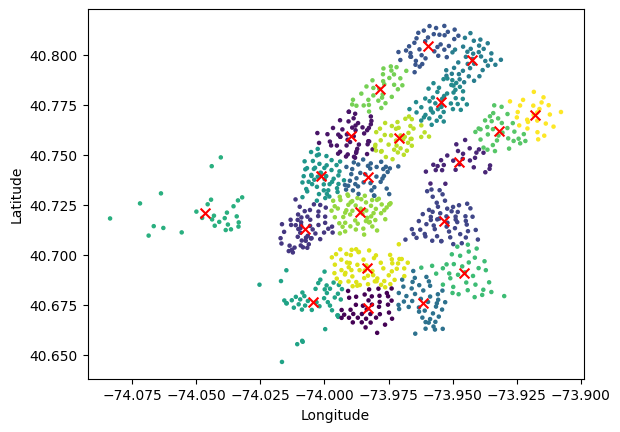

In [22]:
# plot with cluster colour & centriods
plt.scatter(coords_end[:,0], coords_end[:,1], c=kmeans.labels_, s=5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker="x", s=50)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [65]:
#run this cell for coords of starting stations and the fully edited dataframe
coords_start = coords_start_copy.copy()
coords_end = coords_end_copy.copy()
df = df_copy2.copy()
print(df.shape) #to check if no data loss, should be (17548339, 15)
df.head()


(17545760, 14)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber,label
trip_id,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1,15


**Now part 2**

We need to predict the following

Start by splitting up the dataset. Necessary because how are you going to aggregate the data by hour if each datapoint has 2 temporal parameters (start and end station times). Note that we can only use the hour and cluster as input to our model, as these are the only variables we have certain information on for the future datapoints for which we predict the demand, so we only have to copy these variables over in the new datasets. 

In [66]:
#splitting the dataset
df_departures = df[["starttime", "label"]]
df_arrivals = df[["stoptime", "label"]]

#replace the starttime datetime object by a column with hour and cols with date DD, MM. For df_departures and stoptime, DD, MM for df_arrivals
df_departures["start_hour"] = df_departures["starttime"].dt.hour
df_departures["start_day"] = df_departures["starttime"].dt.day
df_departures["start_month"] = df_departures["starttime"].dt.month
df_arrivals["stop_hour"] = df_arrivals["stoptime"].dt.hour
df_arrivals["stop_day"] = df_arrivals["stoptime"].dt.day
df_arrivals["stop_month"] = df_arrivals["stoptime"].dt.month
df_departures.drop(columns=["starttime"], inplace=True)
df_arrivals.drop(columns=["stoptime"], inplace=True)


#remove trip_id index. We will aggregate the data by hour, so this will lost its meaning. 
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

#Count the amount of dataframe rows that have the same label, hour, day and month. and add the count as extra column
df_departures = df_departures.groupby(["label", "start_hour", "start_day", "start_month"]).size().reset_index(name="count")
df_arrivals = df_arrivals.groupby(["label", "stop_hour", "stop_day", "stop_month"]).size().reset_index(name="count")



C:\Users\Matth\AppData\Local\Temp\ipykernel_6764\3835862262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_departures["start_hour"] = df_departures["starttime"].dt.hour
C:\Users\Matth\AppData\Local\Temp\ipykernel_6764\3835862262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_departures["start_day"] = df_departures["starttime"].dt.day
C:\Users\Matth\AppData\Local\Temp\ipykernel_6764\3835862262.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

note: days close to eachother being linked in prediction is already included in the model as you have days and months in your model. And i dont think that it matters that i split up days and months (my guess what taht the model believes the first day of each month is closely related which it isnt. But the month is also included, nevertheless it is a fair thought. Maybe it is better to include the day and month as a counter instead, this will avoid the first day of each month being related! (as yes the months differentiate them, but the first of jun is still close in dist to the first of jan in my method, while with a continuous counter this would really not be the case. Change later

In [67]:
# df_arrivals.head()
df_departures.head()

,label,start_hour,start_day,start_month,count
0,0,0,1,1,2
1,0,0,1,2,2
2,0,0,1,3,4
3,0,0,1,4,16
4,0,0,1,5,2


Train two decision tree regressors. One to predict the amount of departures and one to predict the amount of arrivals. The data has to be split as required in the assignment: Training data contains data from januari - October. Test data contains data from November - December. Hence we will sort the data by month and exploit this sort to make the split. 

In [68]:
#sort the data by month in ascending order
df_departures.sort_values(by=["start_month"], inplace=True)
df_arrivals.sort_values(by=["stop_month"], inplace=True)

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



#split the data into train and test data, training data from month 1-10, test data from month 11-12. 
X_train_dep = df_departures[df_departures["start_month"] < 11].drop(columns=["count"])
X_test_dep = df_departures[df_departures["start_month"] >= 11].drop(columns=["count"])
y_train_dep = df_departures[df_departures["start_month"] < 11]["count"]
y_test_dep = df_departures[df_departures["start_month"] >= 11]["count"]
X_train_arr = df_arrivals[df_arrivals["stop_month"] < 11].drop(columns=["count"])
X_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11].drop(columns=["count"])
y_train_arr = df_arrivals[df_arrivals["stop_month"] < 11]["count"]
y_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11]["count"]

#control check
print(X_train_dep["start_month"].unique())
print(X_train_arr["stop_month"].unique())
print(X_test_dep["start_month"].unique())
print(X_test_arr["stop_month"].unique())

#train the decision tree regressors
reg_dep = DecisionTreeRegressor(random_state=0)
reg_arr = DecisionTreeRegressor(random_state=0)
reg_dep.fit(X_train_dep, y_train_dep)
reg_arr.fit(X_train_arr, y_train_arr)

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[11 12]
[11 12]


0          2
82422    106
13374    177
82411    113
82399    149
Name: count, dtype: int64

Evaluate the models

In [70]:
#predict the amount of departures and arrivals
y_pred_dep = reg_dep.predict(X_test_dep)
y_pred_arr = reg_arr.predict(X_test_arr)

#calculate the r2 score
r2_dep = r2_score(y_test_dep, y_pred_dep)
r2_arr = r2_score(y_test_arr, y_pred_arr)
print("R2 departures: ", r2_dep)
print("R2 arrivals: ", r2_arr)

R2 departures:  -0.2890553332120822
R2 arrivals:  -0.28391965727028445


Plot the results

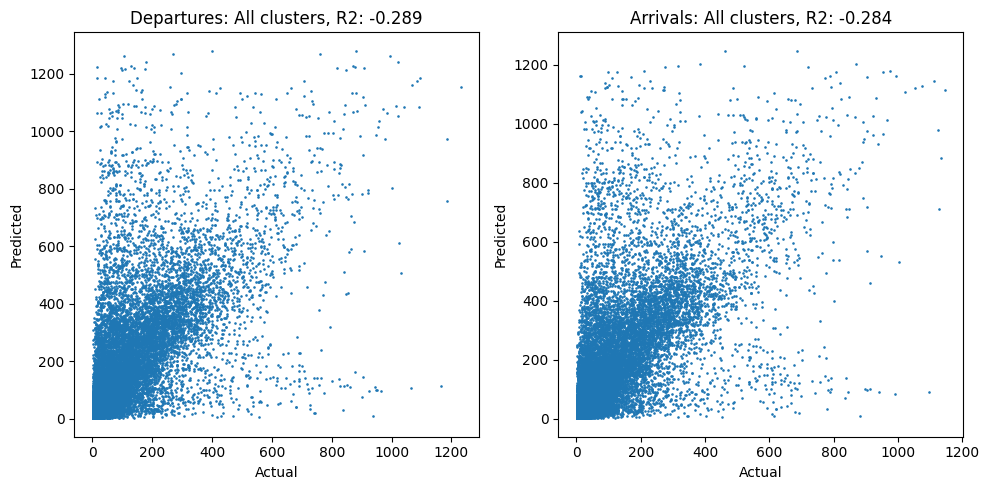

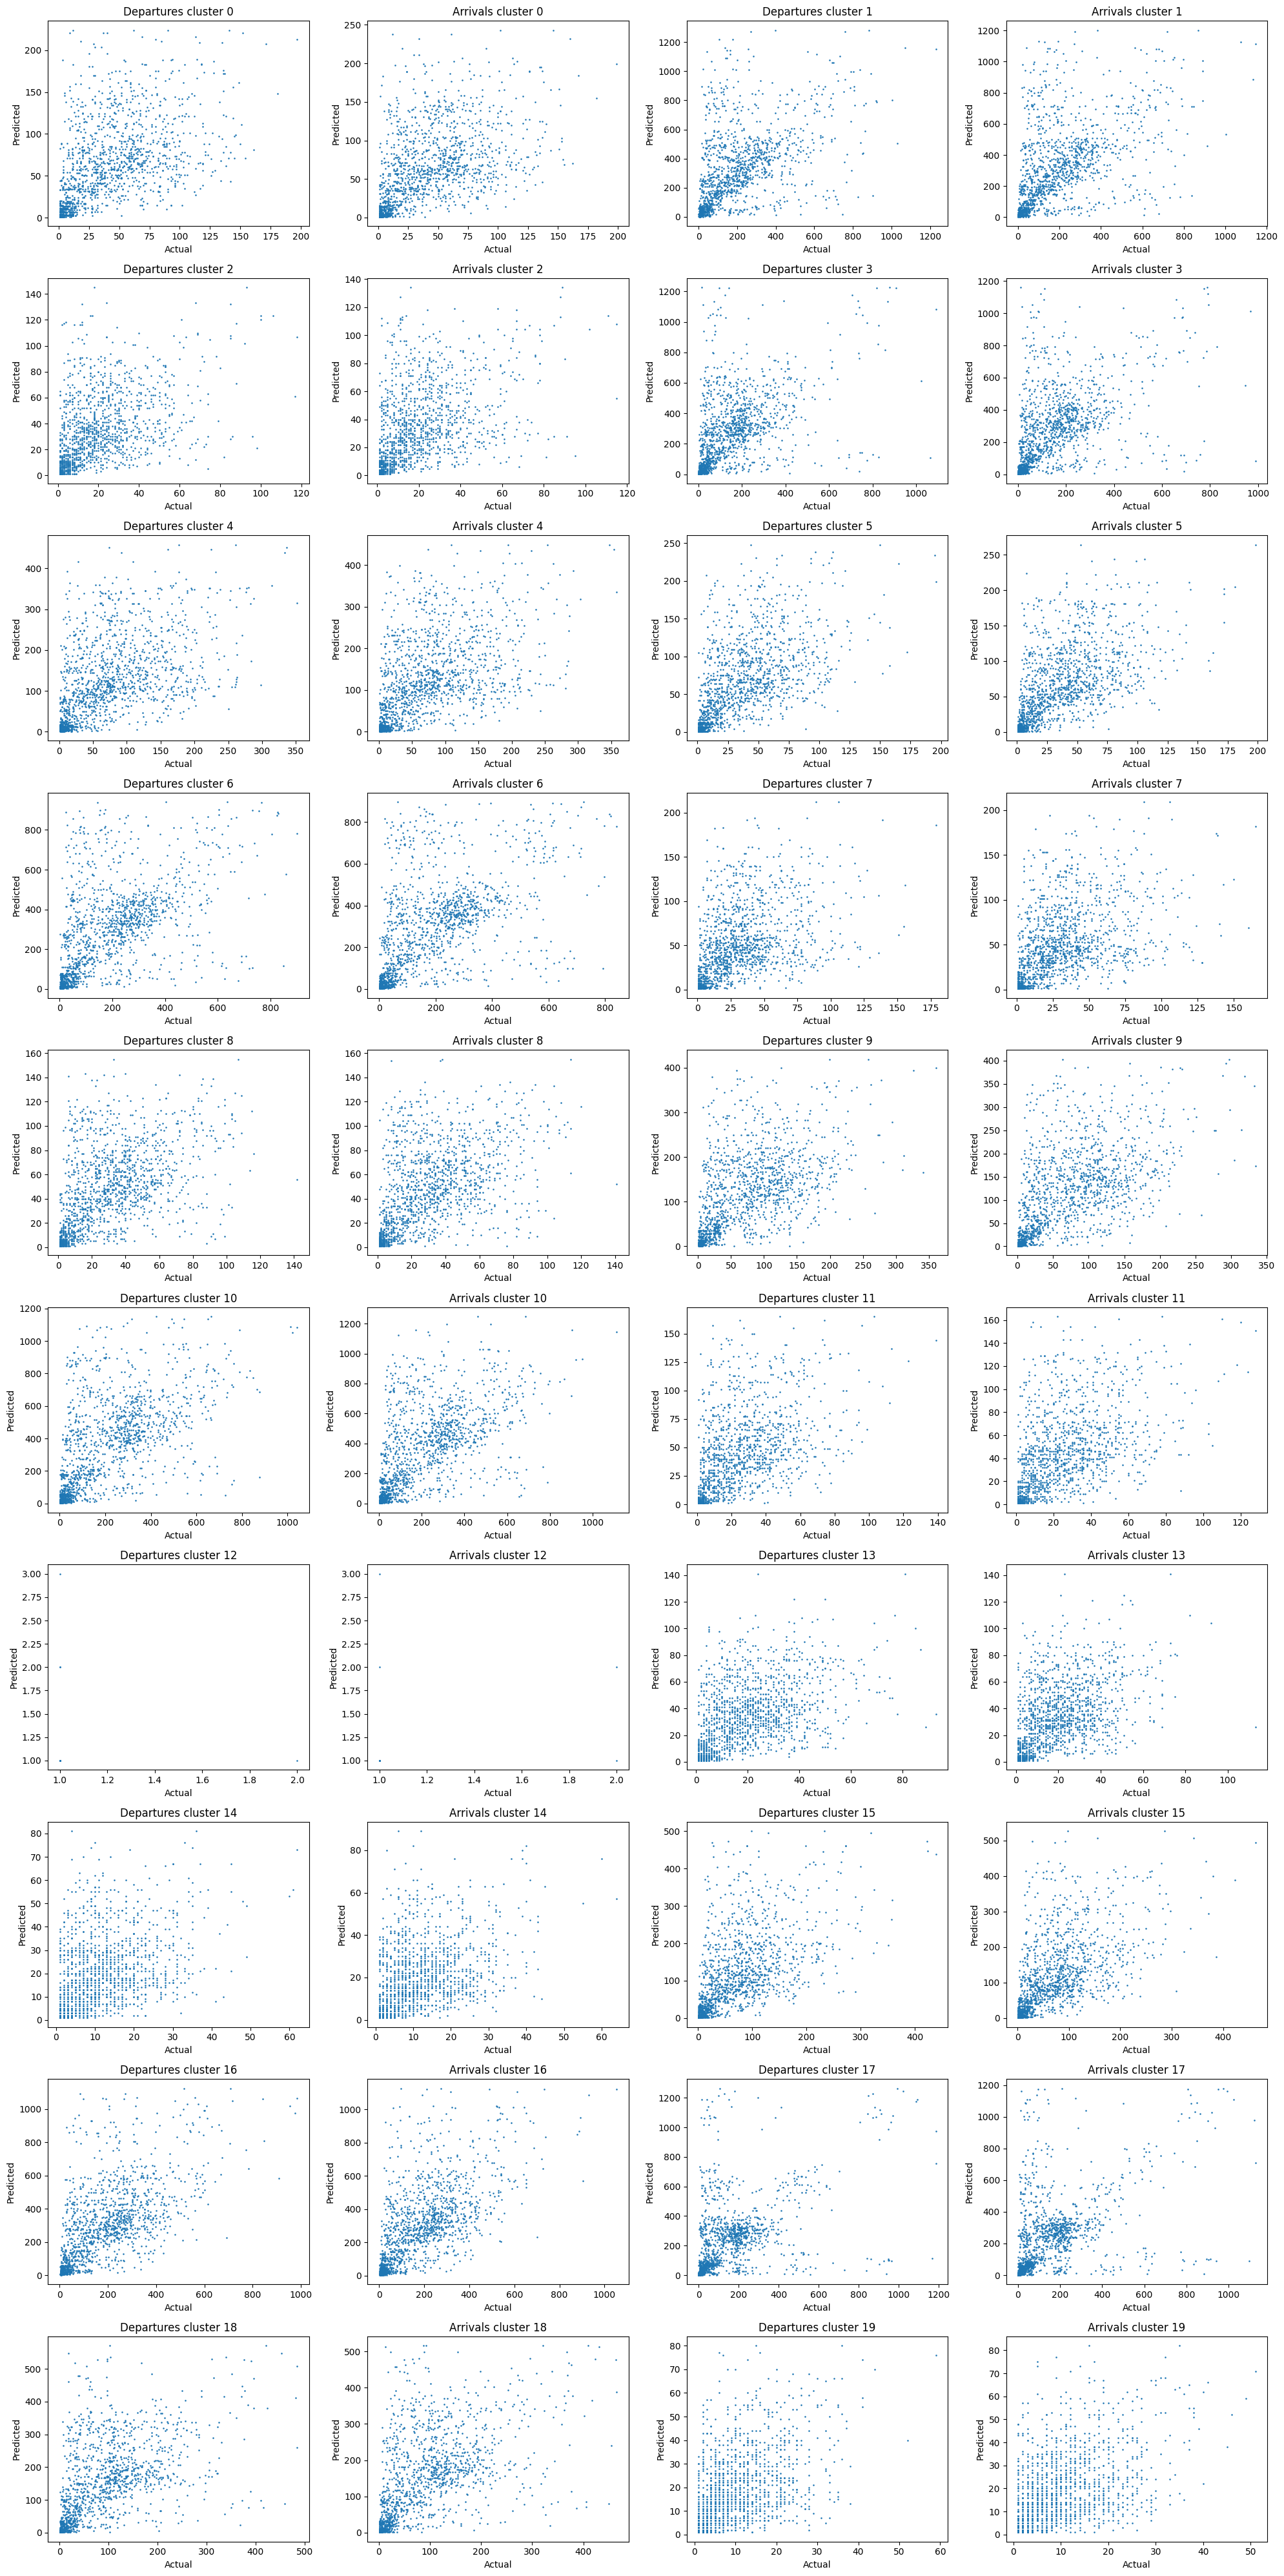

In [71]:
# plot the predicted vs actual amount of departures and arrivals for all clusters
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.ravel()
axs[0].scatter(y_test_dep, y_pred_dep, s=0.75)
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")
axs[0].set_title("Departures: All clusters, R2: " + str(round(r2_dep, 3)))
axs[1].scatter(y_test_arr, y_pred_arr, s=0.75)
axs[1].set_xlabel("Actual")
axs[1].set_ylabel("Predicted")
axs[1].set_title("Arrivals: All clusters, R2: " + str(round(r2_arr, 3)))
plt.tight_layout()
plt.show()


# plot the predicted vs actual amount of departures and arrivals for each cluster individually and put all plots in a compact grid. 
# THis allows us to visually evaluate how good the model is at predicting for each cluster. 
fig, axs = plt.subplots(10, 4, figsize=(20, 40))
axs = axs.ravel()
for i in range(40):
    if i%2 == 0:
        axs[i].scatter(y_test_dep[X_test_dep["label"] == i//2], y_pred_dep[X_test_dep["label"] == i//2], s=0.75)
        axs[i].set_xlabel("Actual")
        axs[i].set_ylabel("Predicted")
        axs[i].set_title("Departures cluster " + str(i//2))
        plt.tight_layout()
    else:
        axs[i].scatter(y_test_arr[X_test_arr["label"] == int(np.floor(i//2))], y_pred_arr[X_test_arr["label"] == int(np.floor(i//2))], s=0.75)
        axs[i].set_xlabel("Actual")
        axs[i].set_ylabel("Predicted")
        axs[i].set_title("Arrivals cluster " + str(int(np.floor(i//2))))
        plt.tight_layout()
plt.show()

Notice that cluster 12 contains little datapoints, this will likely be the cluster which contains the end stations which were not start stations (verify maybe?)

In [76]:
# decision tree to predict count
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# split data per label, extract data on useful variables for training model, split data, train model, print score.
for i in range(20):
    df_label = df[df['label'] == i]
    df_label = df_label[['hour', 'usertype_Subscriber', 'label']]
    X = df_label[['hour', 'usertype_Subscriber']]
    y = df_label['label']
    #data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    print("label: ", i, " score: ", clf.score(X_test, y_test))

label:  0  score:  1.0
label:  1  score:  1.0
label:  2  score:  1.0
label:  3  score:  1.0
label:  4  score:  1.0
label:  5  score:  1.0
label:  6  score:  1.0
label:  7  score:  1.0
label:  8  score:  1.0
label:  9  score:  1.0
label:  10  score:  1.0
label:  11  score:  1.0
label:  12  score:  1.0
label:  13  score:  1.0
label:  14  score:  1.0
label:  15  score:  1.0
label:  16  score:  1.0
label:  17  score:  1.0
label:  18  score:  1.0
label:  19  score:  1.0


In [77]:
# get accuracy
print(clf.score(X_test, y_test))

# R^2
from sklearn.metrics import r2_score

y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r^2 = {r2}')


1.0
r^2 = 1.0


In [78]:
# make a nn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# split data per label
for i in range(20):
    df_label = df[df['label'] == i]
    # split data
    X_train, X_test, y_train, y_test = train_test_split(df_label[['hour','start_station_longitude','start_station_latitude']], df_label['usertype_Subscriber'], test_size=0.2, random_state=0)
    # scale data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # make nn
    clf = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
    clf.fit(X_train, y_train)
    print("label:",i,"score:",clf.score(X_test, y_test))
    


# get accuracy
print(clf.score(X_test, y_test))

# R^2
from sklearn.metrics import r2_score

y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r^2 = {r2}')


label: 0 score: 0.8964607606067267
label: 1 score: 0.8613125079060725
label: 2 score: 0.8879035820074933
label: 3 score: 0.9039478949006358
label: 4 score: 0.8876941741798892
label: 5 score: 0.9248082367823939
label: 6 score: 0.8919752491470209
label: 7 score: 0.9073853335278305
label: 8 score: 0.8697992435263311
label: 9 score: 0.8994966361744349
label: 10 score: 0.8586917545813124
label: 11 score: 0.8678901643811942
label: 12 score: 0.9224865036908274
label: 13 score: 0.9356208132107805
label: 14 score: 0.8797415209375342
label: 15 score: 0.8468405436571177
label: 16 score: 0.8827893635646834
label: 17 score: 0.9011961530120688
label: 18 score: 0.8265874914203707
label: 19 score: 0.9269062651772705
0.9269062651772705
r^2 = -0.07885774168194915


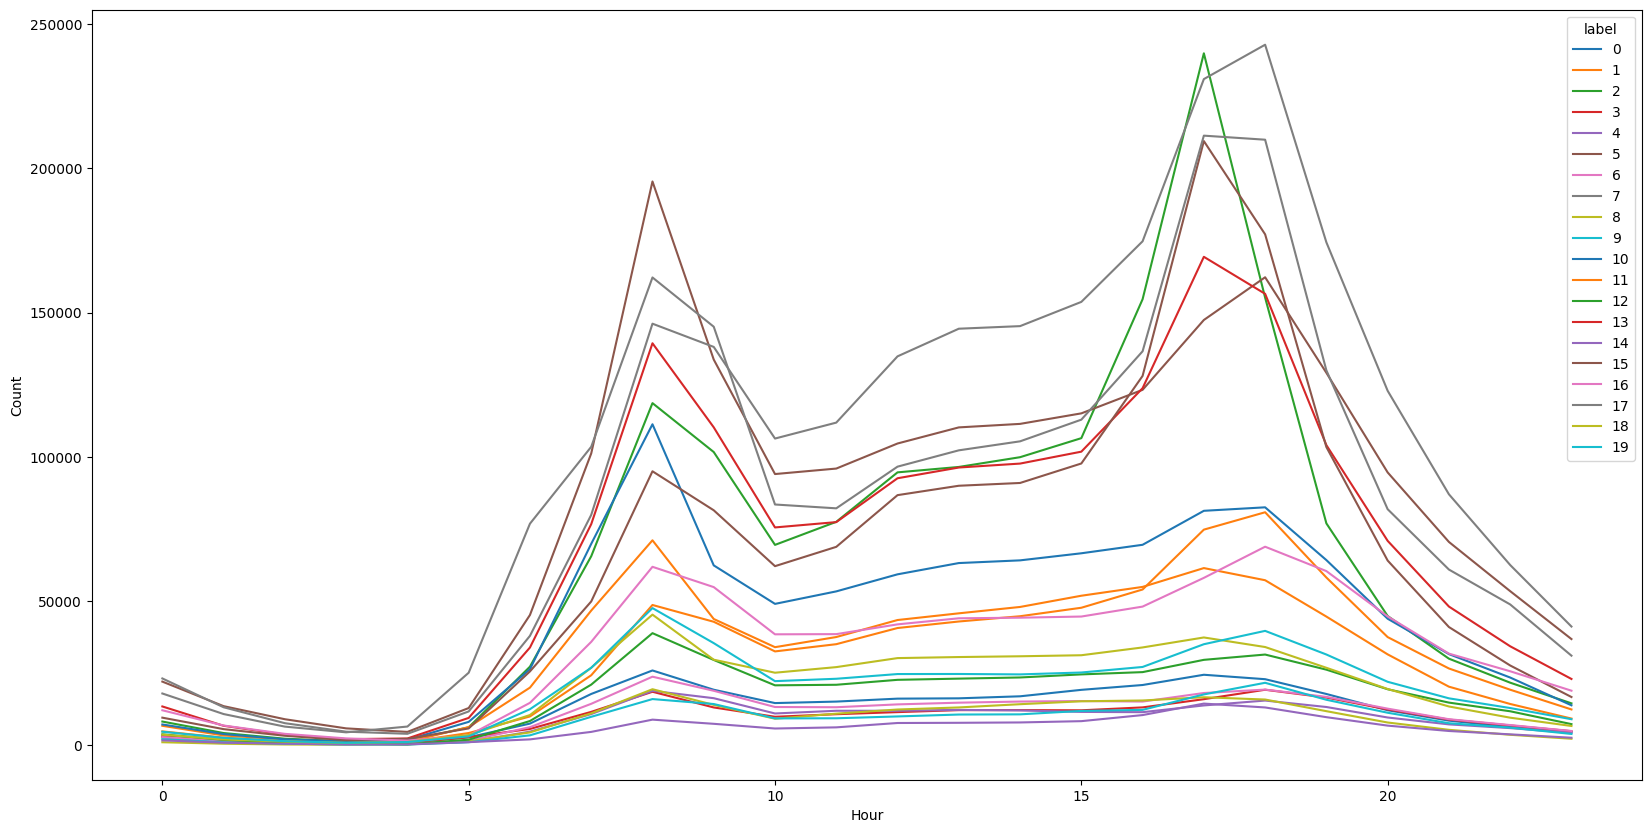

In [79]:
# 1st plot amount of predictions per hour per cluster
grouby_label = df.groupby(['label', df['starttime'].dt.hour]).size().reset_index(name='count')
grouby_label = grouby_label.pivot(index='starttime', columns='label', values='count')
grouby_label.plot(figsize=(20,10))
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

In [80]:
grouby_cluster = df.groupby(['label'])
grouby_cluster.head()


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,hour,usertype_Subscriber,label
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,13,1,17
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,15,1,17
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,15,1,17
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,15,1,17
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,18,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681825,752,2018-01-03 09:26:07.976,2018-01-03 09:38:40.341,3512.0,40.774718,-73.933789,3593.0,40.761584,-73.925921,33324,1991,1,9,1,3
681826,781,2018-01-07 10:56:23.959,2018-01-07 11:09:24.965,3512.0,40.774718,-73.933789,3593.0,40.761584,-73.925921,30630,1991,1,10,1,3
681827,729,2018-01-08 19:37:44.074,2018-01-08 19:49:53.455,3512.0,40.774718,-73.933789,3610.0,40.770845,-73.934171,32188,1971,2,19,1,3


In [81]:
# group same label and hour of start together
grouby_cluster = df.groupby(['label', df['starttime'].dt.hour])
grouby_cluster.head()
# average all other columns
grouby_cluster = grouby_cluster.mean()
grouby_cluster.head()


tripduration                     starttime  \
label starttime                                               
0     0           3103.215857 2018-08-01 10:40:37.257715456   
      1           5048.551486 2018-08-05 08:59:25.736753920   
      2           2283.913091 2018-08-02 16:59:17.238502912   
      3          11718.553797 2018-08-02 10:31:53.655693056   
      4           1049.854359 2018-07-28 13:04:18.100086016   

                                     stoptime  start_station_id  \
label starttime                                                   
0     0         2018-08-01 11:32:20.990116864       3476.483758   
      1         2018-08-05 10:23:34.779875072       3474.431237   
      2         2018-08-02 17:37:21.642013184       3477.130913   
      3         2018-08-02 13:47:12.730523904       3483.229430   
      4         2018-07-28 13:21:48.450860544       3479.983590   

                 start_station_latitude  start_station_longitude  \
label starttime                                                    
0     0                       40.798156               -73.943243   
      1                       40.798297               -73.943269   
      2                       40.798404               -73.943255   
      3                       40.798439               -73.943067   
      4                       40.796987               -73.942584   

                 end_station_id  end_station_latitude  end_station_longitude  \
label starttime                                                                
0     0             3378.628013             40.795102             -73.946371   
      1             3398.898411             40.795915             -73.946689   
      2             3377.117712             40.795758             -73.946856   
      3             3427.036392             40.796697             -73.948102   
      4             3231.594872             40.790132             -73.952946   

                       bikeid   birth_year    gender  hour  \
label starttime                                              
0     0          26969.643381  1982.950402  1.097450   0.0   
      1          27129.096752  1984.100898  1.065653   1.0   
      2          27123.867987  1982.902090  1.041804   2.0   
      3          27154.514241  1981.344937  1.056962   3.0   
      4          26796.044103  1979.241026  1.274872   4.0   

                 usertype_Subscriber  
label starttime                       
0     0                     0.889626  
      1                     0.870767  
      2                     0.845985  
      3                     0.851266  
      4                     0.930256

In [82]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,hour,usertype_Subscriber,label
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,13,1,17
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,15,1,17
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,15,1,17
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,15,1,17
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,18,1,17


In [83]:
# amount of predictions per hour per cluster in df
df['demand'] = df.groupby(['label', df['starttime'].dt.hour])['label'].transform('count')
df.head()



,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,hour,usertype_Subscriber,label,demand
trip_id,,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,13,1,17,102247
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,15,1,17,112884
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,15,1,17,112884
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,15,1,17,112884
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,18,1,17,209964


In [84]:
grouby_label.head()

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
starttime,,,,,,,,,,,,,,,,,,,,
0,2863,6718,8200,3131,2697,22049,2773,23146,1024,2071,7187,4787,3777,13435,1675,9547,12111,17930,3650,4675
1,1447,3382,4213,1655,1752,13538,1534,13151,513,1007,3862,2612,1828,6729,862,5567,6823,10798,1991,2543
2,909,1986,2252,913,1051,9003,814,7632,246,537,2017,1344,925,3670,523,3273,3934,6441,1232,1393
3,632,1112,1347,683,684,5833,470,4687,164,271,1331,766,590,2101,260,1754,2359,4458,789,818
4,975,1111,1520,688,569,4614,409,3951,267,228,1862,1152,313,2332,282,2203,1594,6467,1116,1096


In [85]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [86]:
# split data into train and test (80/20)
train = df.sample(frac=0.8,random_state=42)
test = df.drop(train.index)

In [87]:
# make linear regression model per cluster/label
models = []
for i in range(20):
    X = grouby_label[i].index.values.reshape(-1, 1)
    y = grouby_label[i].values
    regr = linear_model.LinearRegression()
    print(X.shape)
    print(y.shape)
    print(type(X))
    print(type(y))
    print(X[0])
    print(y[0])
    regr.fit(X, y)
    models.append(regr)
    

# for i in range(20):
    # X = train[train['label'] == i]['starttime'].dt.hour.values.reshape(-1, 1)
    # y = train[train['label'] == i]['tripduration'].values
    # regr = linear_model.LinearRegression()
    # regr.fit(X, y)
    # models.append(regr)
# THIS ISNT USING THE RIGHT X YET, not sure how the groupby df is working rn

# for i in range(20):
#     X = grouby_label[i].index.values.reshape(-1, 1)
#     y = grouby_label[i].values
#     regr = linear_model.LinearRegression()
#     regr.fit(X, y)
#     models.append(regr)

(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
2863
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
6718
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
8200
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
3131
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
2697
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
22049
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
2773
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
23146
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
1024
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
2071
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
7187
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
4787
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
3777
(24, 1)
(24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0]
13435
(24

In [88]:
# make predictions
preds = []
for i in range(20):
    preds.append(models[i].predict(grouby_label[i].index.values.reshape(-1, 1)))


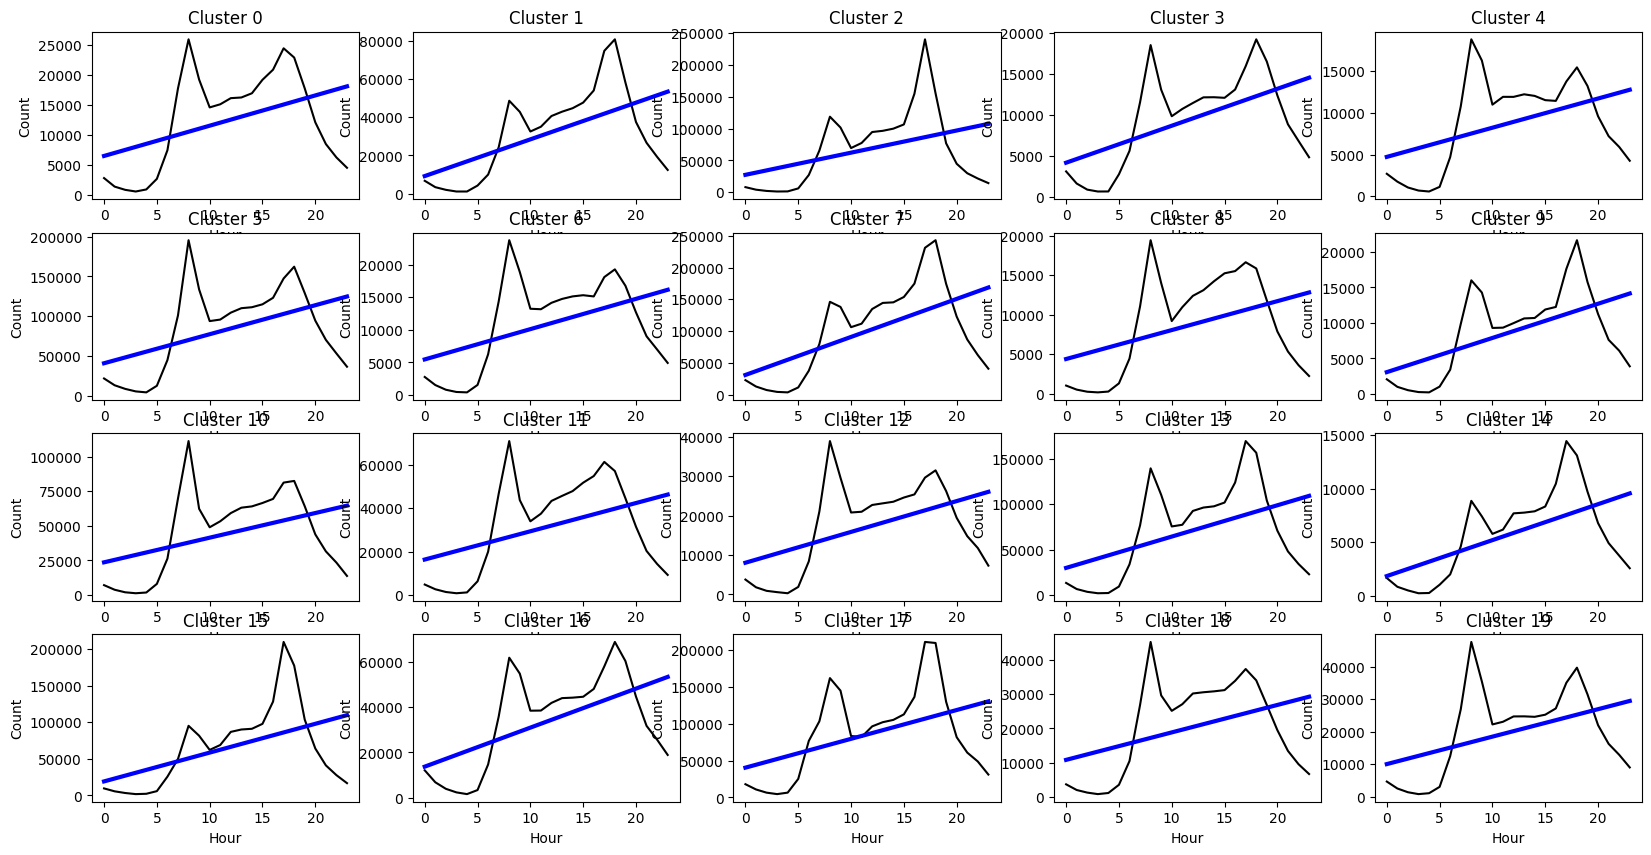

In [89]:
# plot predictions 4x5 grid
fig, axs = plt.subplots(4, 5, figsize=(20, 10))
axs = axs.ravel()
for i in range(20):
    axs[i].plot(grouby_label[i].index.values, grouby_label[i].values, color='black')
    axs[i].plot(grouby_label[i].index.values, preds[i], color='blue', linewidth=3)
    axs[i].set_title('Cluster ' + str(i))
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Hour')
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression

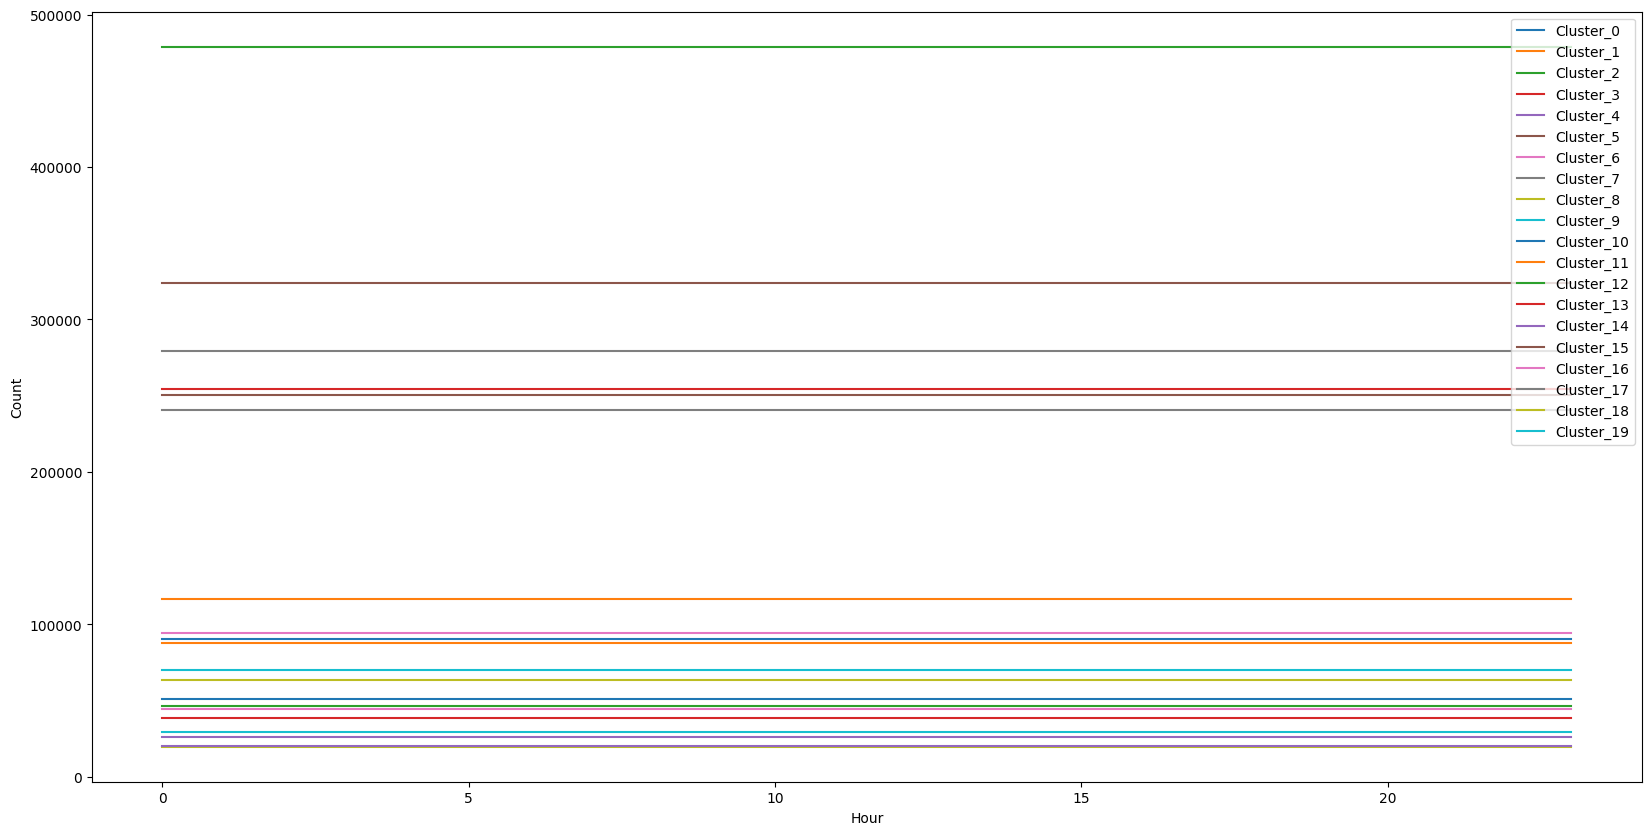

In [91]:
# Create an empty dictionary to store the linear regression models for each cluster
models = {}

# Train a linear regression model for each cluster
for cluster_label in range(20):
    # Filter the data for the current cluster
    cluster_data = df[df['label'] == cluster_label]
    
    # Extract features (X) and target (y)
    X = cluster_data[['starttime']].values
    y = cluster_data['demand'].values
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the model in the dictionary
    models[cluster_label] = model

# Create an empty DataFrame to store the predictions
predictions_df = pd.DataFrame()

# Make predictions for each cluster and add them to the DataFrame
for cluster_label in range(20):
    # Extract the hours for which you want to make predictions
    hours_to_predict = grouby_label.index.values
    
    # Create a feature matrix with these hours
    X_predict = hours_to_predict.reshape(-1, 1)
    
    # Make predictions using the model for the current cluster
    predictions = models[cluster_label].predict(X_predict)
    
    # Add the predictions to the DataFrame
    predictions_df['Cluster_' + str(cluster_label)] = predictions

# Plot the predictions
predictions_df['Hour'] = hours_to_predict
predictions_df.set_index('Hour', inplace=True)
predictions_df.plot(figsize=(20, 10))
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

Matthias Attempt

Data preparation

In [87]:
print(len(df["start_station_id"].unique()))
print(len(df["end_station_id"].unique()))
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)
print(len(coords))
coords = df[['end_station_longitude','end_station_latitude']].values
coords = np.unique(coords, axis=0)
print(len(coords))


816
848
817
849


In [44]:
#copy dataset and distinct coordinates
df = df_matt.copy()
coords = coords_copy.copy()

# Create an additional column in df with the distinct station_id using the kmeans model
for i in range(len(coords)):
    df.loc[(data['start_station_longitude'] == coords[i][0]) & (df['start_station_latitude'] == coords[i][1]), 'station_id'] = i
df.head()
# print(df["station_id"].unique())


#split dataset up. Create two datasets, one with 










,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,hour,usertype_Subscriber,station_id
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,13,1,167.0
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,15,1,167.0
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,15,1,167.0
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,15,1,167.0
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,18,1,167.0


In [ ]:
#code treasury





    # Create an empty dictionary to store the linear regression models for each station for stations within only one of the 20 clusters
models = {}

# Train a linear regression model for each station within the specified cluster
for station_id in df["station_id"].unique():
    # Filter the data for the current station
    station_data = df[df['station_id'] == station_id]
    
    # Extract features (X) and target (y)
    X = station_data[['starttime']].values
    y = station_data['demand'].values
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the model in the dictionary
    models[station_id] = model

Collaboration # not included in wordcouter.py


In [26]:
#what does bike id mean? unique id for a certain bike

[1992 1969 1956 1974 1968 1978 1983 1947 1982 1991 1963 1967 1964 1965
 1973 1977 1996 1985 1960 1962 1959 1966 1957 1979 1989 1987 1988 1984
 1980 1995 1958 1970 1994 1972 1971 1955 1993 1990 1952 1954 1975 1976
 1953 1998 1997 1981 1946 1950 1951 2000 1999 1986 1948 1961 1949 1944
 2001 1945 1942 1937 1939 1940 1900 1943 1941 1938 1929 1918 1923 1912
 1885 1936 1931 1899 1887 1934 2002 1932 1886 1921 1910 1933 1894 1917
 1935 1901 1916 1919 1888 1889 1907 1926 1890 1930 1928 1915 1897 1925
 1913 1895 1924 1893 1911 1909 1906 1927 1920 1922 1896]
